In [31]:
#%reset

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
import os
path = os.getcwd() + '/data/ex1data2.txt'
data = pd.read_csv(path, header = None, names = ['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Normalization:

In [68]:
data = (data - data.mean()) / data.std()

data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## Data Prep

In [69]:
data.insert(0, 'ones', 1)

cols = data.shape[1]

x = data.iloc[:, 0:cols-1]

y = data.iloc[:,cols-1:]

In [84]:
x = np.matrix(x)
y = np.matrix(y)
theta = np.matrix([0, 0, 0])

x.shape, y.shape, theta.shape

((47, 3), (47, 1), (1, 3))

## Gradient Descent method

In [85]:
# Gradient Descent Cost function
def GD_cost(x, y, theta):
    inner = np.power(((x * theta.T) - y), 2)
    return (np.sum(inner)) * (1 / (2 * len(x)))

In [86]:
# theta update rule based on the gradient of error
def Theta_update(x, y, theta, alpha):
    sum_element = ((x * theta.T) - y).T * x
    return theta - ((sum_element * alpha) / len(x))

In [87]:
# Initializations
theta = np.matrix([0, 0, 0])
alpha = 0.01
iters = 1000

In [88]:
# GD estimates
def GD_estimates(x, y, theta, alpha, iters):
    cost = []
    for _ in range(iters):
        theta = Theta_update (x, y, theta, alpha)
        cost.append(GD_cost(x, y, theta))
    cost = np.array(cost)
    return theta, cost  

In [89]:
thetahat, cost = GD_estimates(x, y, theta, alpha, iters)

thetahat

matrix([[ -1.03120822e-16,   8.78503652e-01,  -4.69166570e-02]])

In [90]:
cost[0:10], cost[len(cost)-10:]

(array([ 0.4805491 ,  0.47198588,  0.46366462,  0.45557814,  0.44771948,
         0.44008189,  0.43265881,  0.42544389,  0.41843096,  0.41161404]),
 array([ 0.13070473,  0.13070458,  0.13070442,  0.13070427,  0.13070411,
         0.13070396,  0.13070381,  0.13070366,  0.13070352,  0.13070337]))

In [91]:
GD_cost(x, y, thetahat)

0.13070336960771892

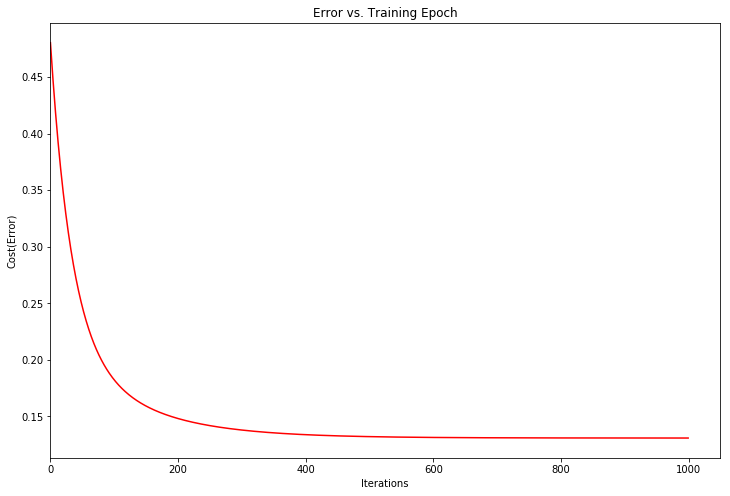

In [95]:
fig, ax = plt.subplots(figsize = (12,8))

ax.plot(np.arange(iters), cost, 'r')

ax.set_xlim(xmin = 0)

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost(Error)')
ax.set_title('Error vs. Training Epoch');

## Utilizing scikit-learn's linear regression class

In [111]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [128]:
thetahat_skl = model.coef_

thetahat_skl

array([[ 0.        ,  0.88476599, -0.05317882]])

In [152]:
model.predict(x).flatten(), (x * thetahat.T).A1

(array([ 0.12692309, -0.43419524,  0.45646878, -0.56916611,  1.05458494,
        -0.07544503, -0.50767502, -0.62680133, -0.67912784, -0.55220822,
        -0.12554488,  0.01113677, -0.11132953,  2.63020487, -0.8038208 ,
         0.27525393, -0.6760458 , -0.83944737,  0.61927291,  1.08909818,
        -0.24826912, -0.04367434, -0.42974192, -0.10105162,  2.11533051,
        -0.99086025, -0.5922881 ,  0.59674836,  0.23380277,  0.72032799,
        -0.09822752, -0.96242956, -0.01421188,  1.276993  , -0.26916445,
        -0.61566803, -0.83610738,  0.08821449,  2.40728092,  0.12161439,
        -0.29306027,  0.27610932,  0.57251305, -0.87952725, -1.19708425,
        -0.22351792, -0.87618726]),
 array([ 0.12470824, -0.43243852,  0.45192141, -0.57418852,  1.05353857,
        -0.06849309, -0.50539822, -0.62368136, -0.6756375 , -0.54961621,
        -0.11823834,  0.00974145, -0.11185805,  2.62574076, -0.7994479 ,
         0.27972363, -0.68031171, -0.83482229,  0.62130766,  1.08780752,
        -0.2478

In [153]:
MSE_skl, MSE_GD = mean_squared_error(y, model.predict(x)), mean_squared_error(y, (x * thetahat.T))

MSE_skl, MSE_GD

(0.26137296107808394, 0.26140673921543783)